#Problem statement

Our objective is to build a predictive model that can accurately determine whether an applicant is likely to be a good or bad credit risk. This model will assist the bank in making informed decisions about granting credit to applicants.

#Data dictionary


In [2]:
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')

('german.data', <http.client.HTTPMessage at 0x78bd358576a0>)

In [3]:
import urllib.request

urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc= f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

#Import Libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Data Exploration


In [5]:
german_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
                        delimiter=' ',header=None)

In [6]:
german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'installment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']

In [ ]:
german_df.head()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,installment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
german_df.shape

(1000, 21)

In [ ]:
german_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_bal           1000 non-null   object
 1   duration              1000 non-null   int64 
 2   payment_status        1000 non-null   object
 3   purpose               1000 non-null   object
 4   credit_amount         1000 non-null   int64 
 5   savings_bond_value    1000 non-null   object
 6   employed_since        1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   sex_marital           1000 non-null   object
 9   guarantor             1000 non-null   object
 10  residence_since       1000 non-null   int64 
 11  most_valuable_asset   1000 non-null   object
 12  age                   1000 non-null   int64 
 13  concurrent_credits    1000 non-null   object
 14  type_of_housing       1000 non-null   object
 15  number_of_existcr     1000 non-null   i

The dataset contains 21 variables and 1000 observatios. 8 variables are of numeric type and 13 of object type.

In [ ]:
german_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
number_of_existcr,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
number_of_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
target,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


In [ ]:
for col in ['account_bal', 'payment_status', 'purpose', 'savings_bond_value', 'employed_since', 'sex_marital', 'guarantor', 'most_valuable_asset', 'concurrent_credits', 'type_of_housing', 'job', 'telephon', 'foreign']:
    print(german_df[col].value_counts())

A14    394
A11    274
A12    269
A13     63
Name: account_bal, dtype: int64
A32    530
A34    293
A33     88
A31     49
A30     40
Name: payment_status, dtype: int64
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: purpose, dtype: int64
A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings_bond_value, dtype: int64
A73    339
A75    253
A74    174
A72    172
A71     62
Name: employed_since, dtype: int64
A93    548
A92    310
A94     92
A91     50
Name: sex_marital, dtype: int64
A101    907
A103     52
A102     41
Name: guarantor, dtype: int64
A123    332
A121    282
A122    232
A124    154
Name: most_valuable_asset, dtype: int64
A143    814
A141    139
A142     47
Name: concurrent_credits, dtype: int64
A152    713
A151    179
A153    108
Name: type_of_housing, dtype: int64
A173    630
A172    200
A174    148
A171     22
Name: job, dtype: int64
A191    596
A192    404
Name: telephon, dtype: int64


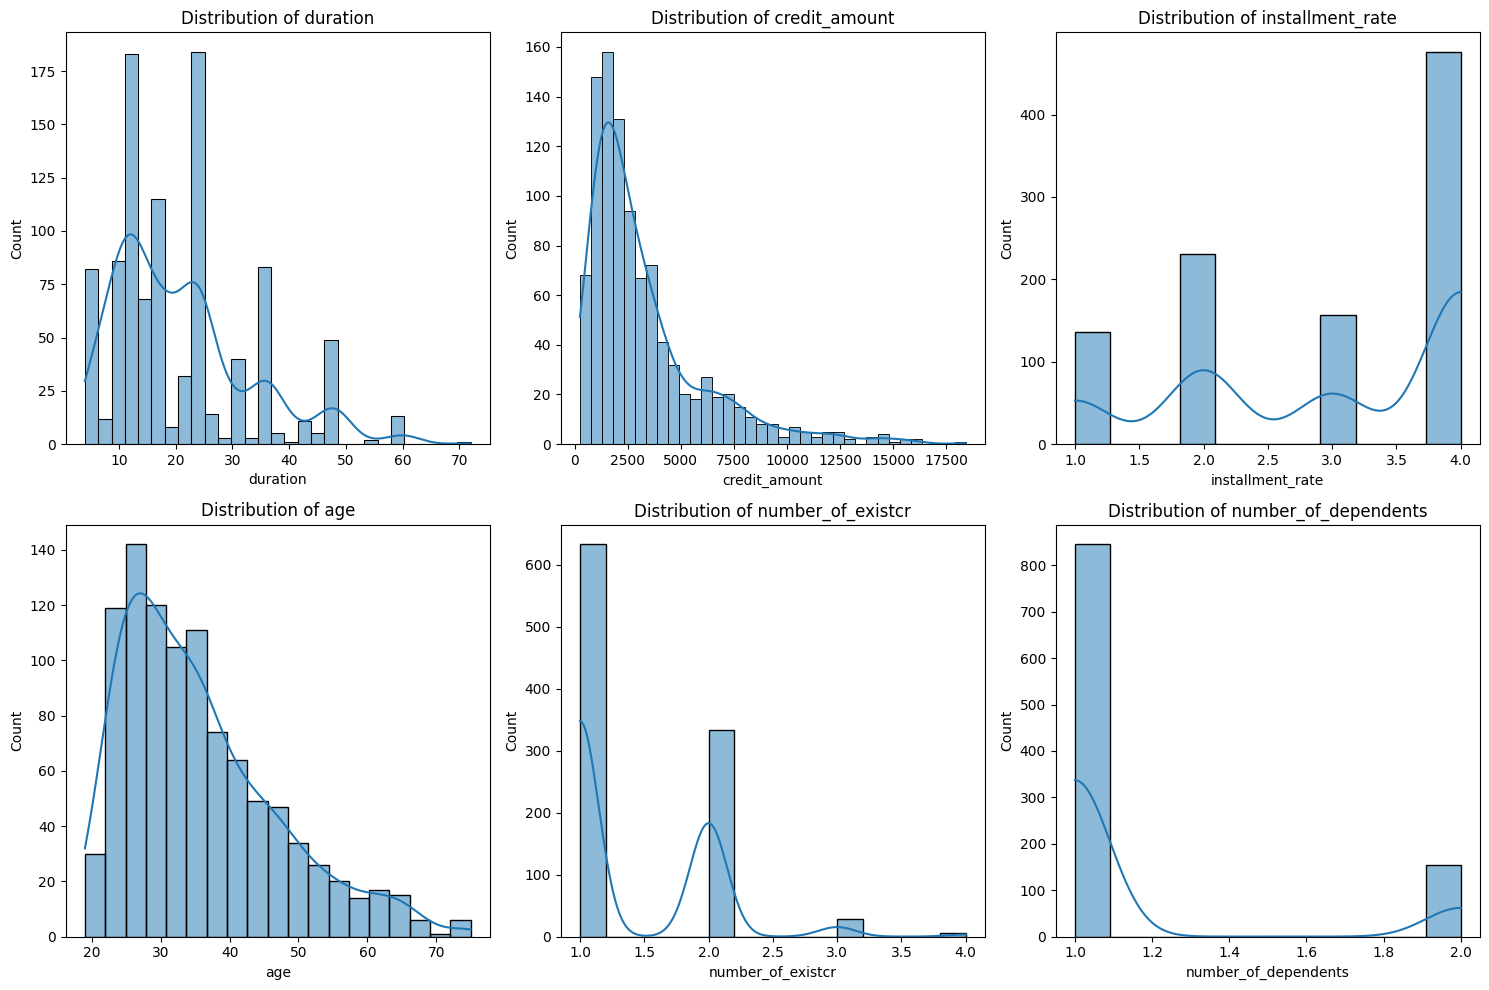

In [ ]:
#Lets analysze the distribution of the various attributes
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['duration', 'credit_amount', 'installment_rate', 'age', 'number_of_existcr', 'number_of_dependents']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  #

for i, col in enumerate(num_cols):
    row = i // 3
    col = i % 3
    sns.histplot(data=german_df, x=num_cols[i], kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {num_cols[i]}')

plt.tight_layout()
plt.show()


In [ ]:
german_df['target']=german_df['target'].astype('category')

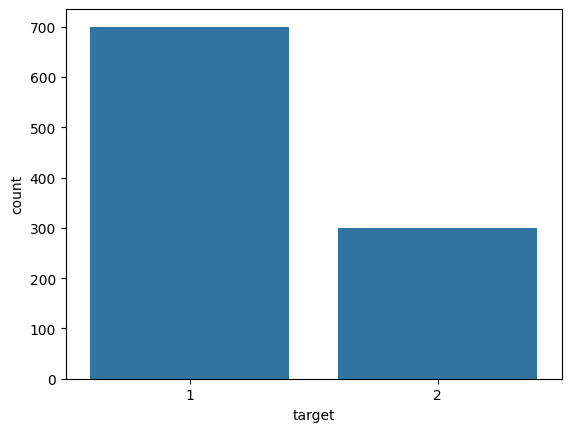

In [ ]:
sns.countplot(x='target',data=german_df)
plt.show()


In [ ]:
german_df['target'].value_counts(normalize=True)


1    0.7
2    0.3
Name: target, dtype: float64

The positive class or class 1 (people having bad credit rík) is 30% and class 2 is 70%


In [ ]:
german_df.groupby(["target"]).mean()


<ipython-input-18-e54e28d9822e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  german_df.groupby(["target"]).mean()


,duration,credit_amount,installment_rate,residence_since,age,number_of_existcr,number_of_dependents
target,,,,,,,
1,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
2,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333


On average, customers with a good credit risk (2) have higher values for duration, credit amount, installment rate, residence since, number of existing credits, and number of dependents compared to customers with a bad credit risk (1). However, the average age is slightly lower for customers with a good credit risk.

<Figure size 1000x1000 with 0 Axes>

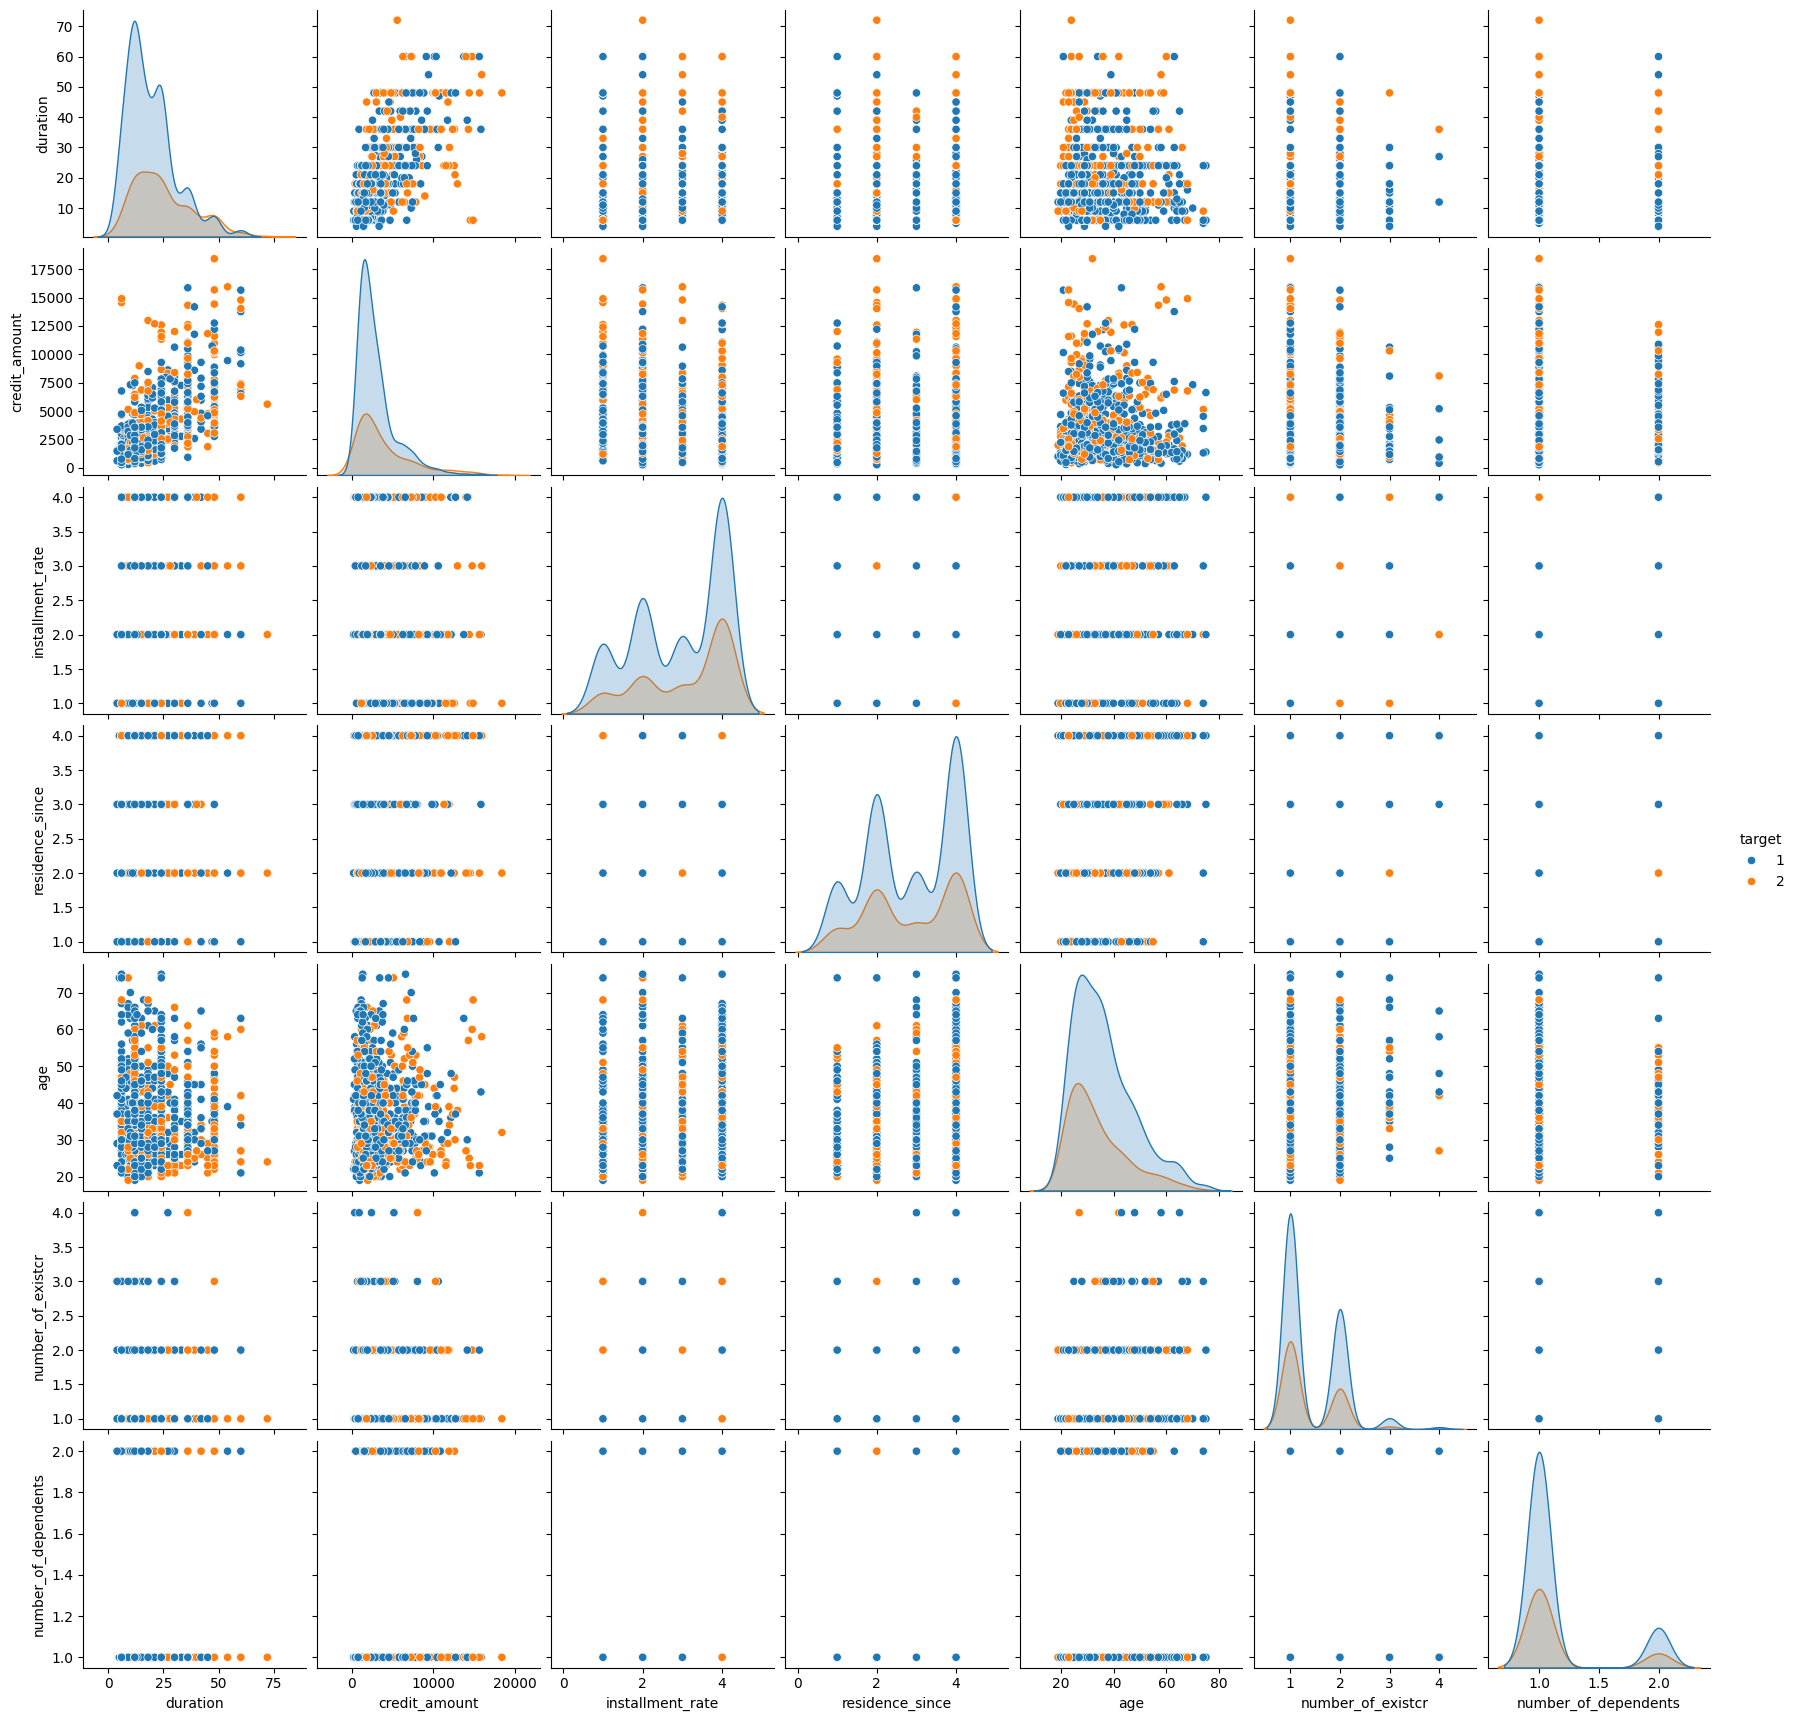

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(german_df, hue='target')
plt.show()

- **Skewness**: Data for all the attributes appear to be skewed, especially for variables such as duration, credit amount, and age. This indicates that the majority of the customers have lower values for these variables.
- **Credit Amount**: The mean credit amount is higher for customers with a good credit risk, indicating that they tend to take on larger amounts of credit. However, the distribution is skewed, suggesting that there are some customers with very high credit amounts.
- **Duration**: The duration variable also appears to be skewed, with customers with a good credit risk having a longer average duration. This could suggest that these customers are more likely to have long-term financial commitments.
- **Installment Rate and Number of Existing Credits**: These attributes seem to have a more or less symmetrical distribution, indicating that they might not have a significant impact on the credit risk.
- **Age**: While one might expect age to have a normal distribution, the constraints on the data collection (e.g., only including customers of a certain age range) may have skewed the distribution. There doesn’t seem to be a clear relationship between age and credit risk.
- **Number of Dependents**: Most customers have fewer than 3 dependents, and there doesn’t seem to be a clear relationship between the number of dependents and the credit risk.



<ipython-input-20-ed3fe8d019cb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(german_df.corr(), annot=True)


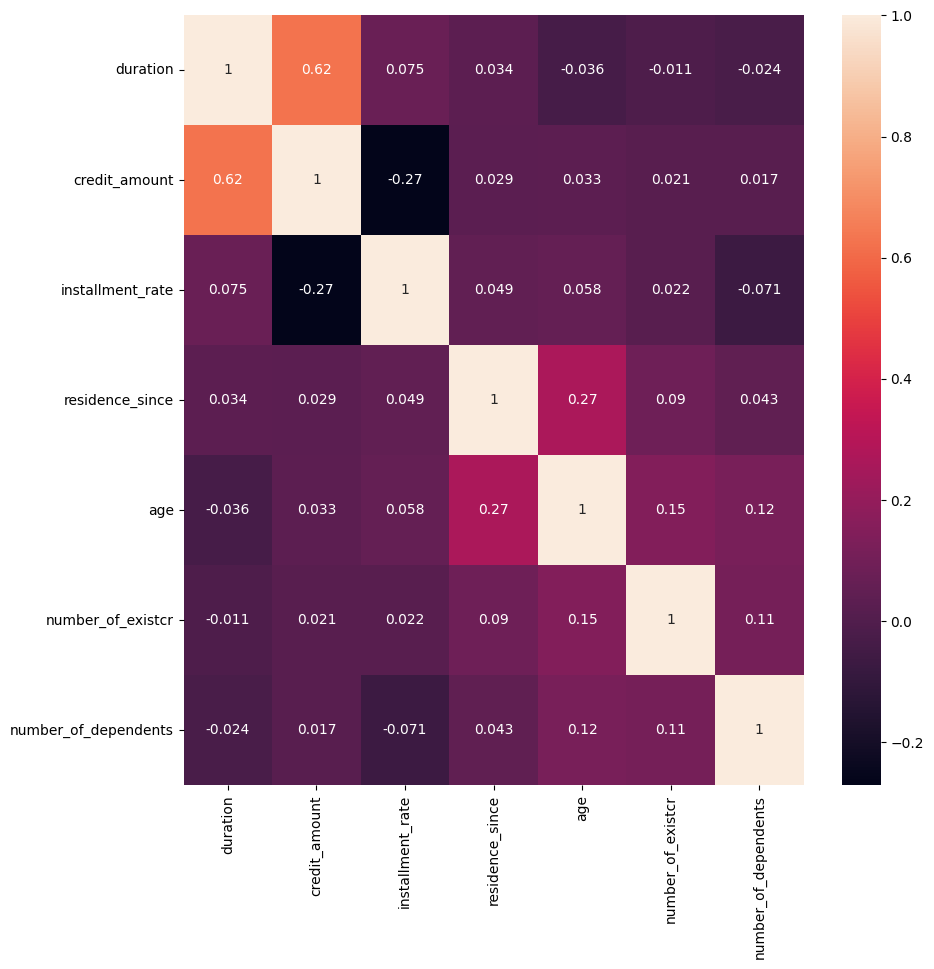

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(german_df.corr(), annot=True)
plt.show()


As we can see that all the varibles have a low correlation with each other, so we can not eliminate any variables

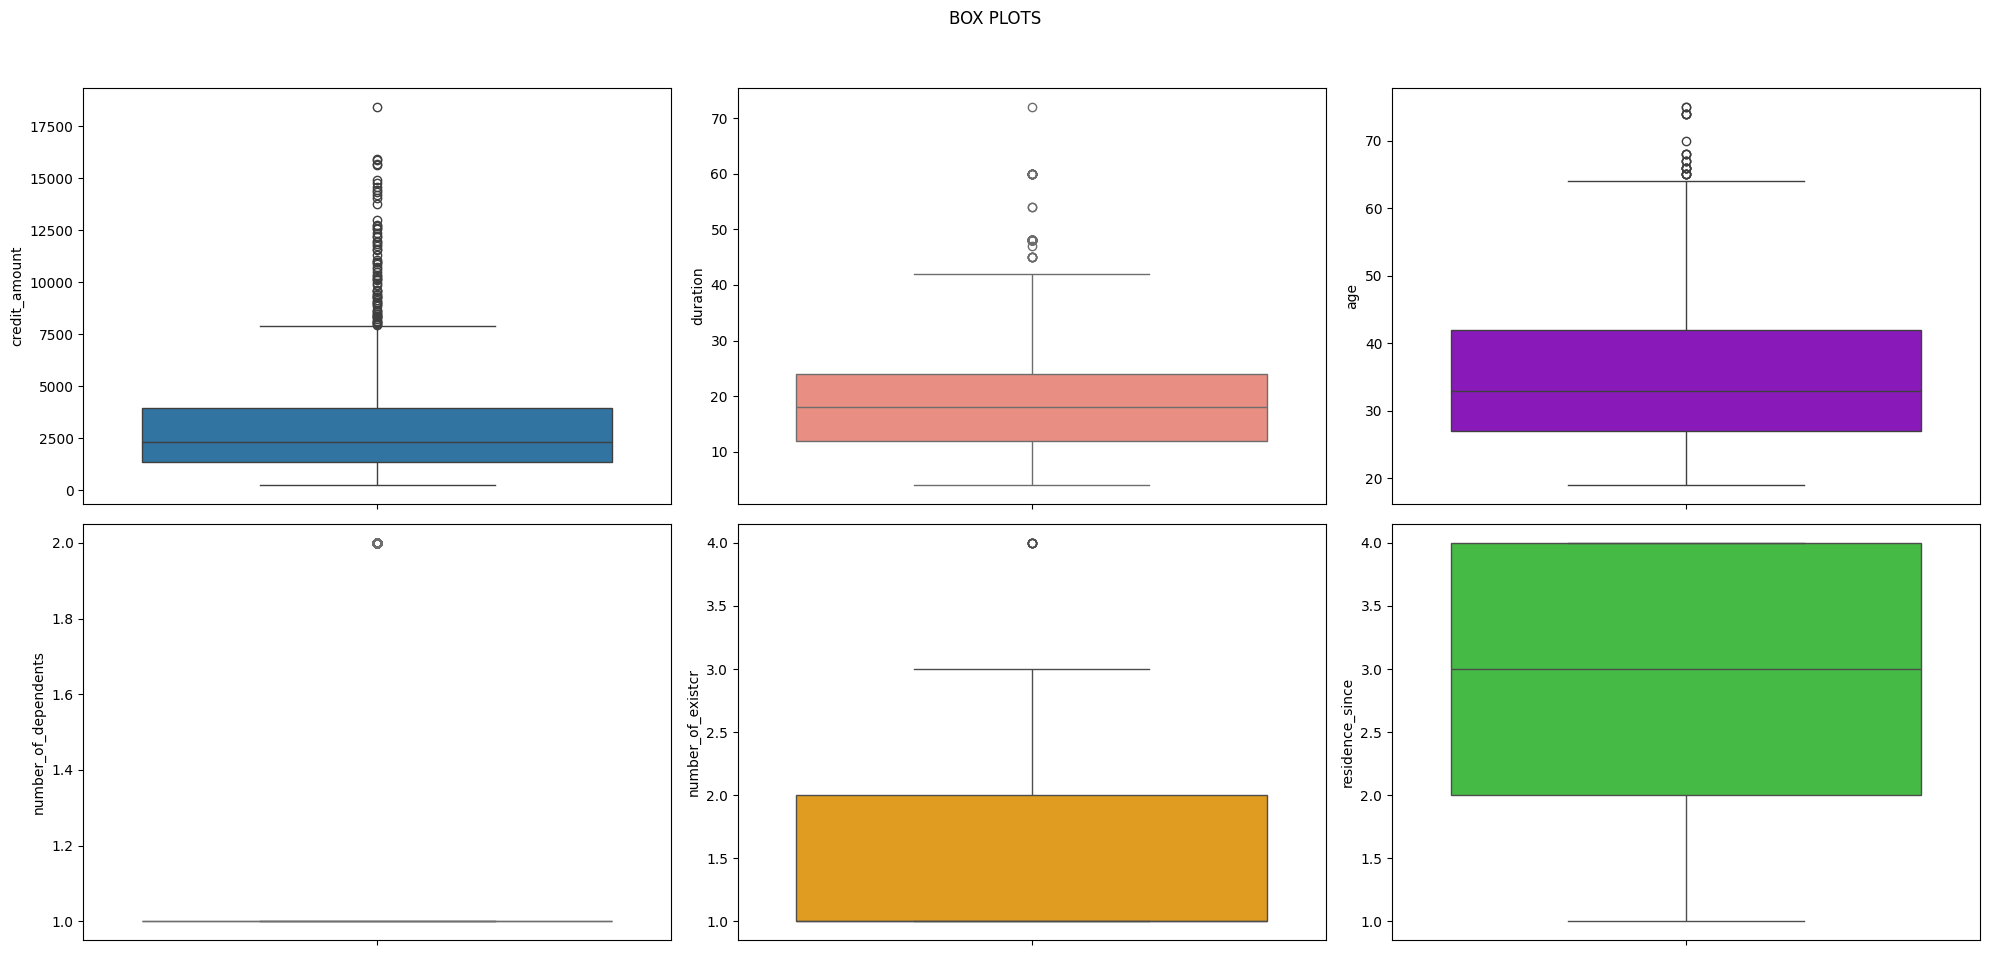

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
plt.suptitle('BOX PLOTS')

sns.boxplot(german_df['credit_amount'], ax=ax[0, 0])
sns.boxplot(german_df['duration'], ax=ax[0, 1], color='salmon')
sns.boxplot(german_df['age'], ax=ax[0, 2], color='darkviolet')
sns.boxplot(german_df['number_of_dependents'], ax=ax[1, 0], color='skyblue')
sns.boxplot(german_df['number_of_existcr'], ax=ax[1, 1], color='orange')
sns.boxplot(german_df['residence_since'], ax=ax[1, 2], color='limegreen')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


1. **Credit Amount**: The box plot for credit amount shows a number of outliers, indicating that there are some customers with very high credit amounts. The median credit amount seems to be around 2500, but the data is skewed towards higher values.

2. **Duration**: The duration of credit also has a number of outliers and the data is skewed towards higher values. The median duration seems to be around 20 months.

3. **Age**: The age of customers seems to be fairly evenly distributed, with a median around 30 years. There are some outliers indicating that there are some customers who are significantly older than the rest.

4. **Number of Dependents**: Most customers appear to have fewer than 2 dependents, with very few outliers. This suggests that the number of dependents does not vary widely among customers.

5. **Number of Existing Credits**: Most customers have 1 or 2 existing credits. There are a few customers with more than 2 existing credits, but they are outliers.

6. **Residence Since**: The residence since variable seems to be fairly evenly distributed, with a median of about 3 years. There are a few outliers, indicating some customers have been residing at their current location for a significantly longer time.

number of category field:  13


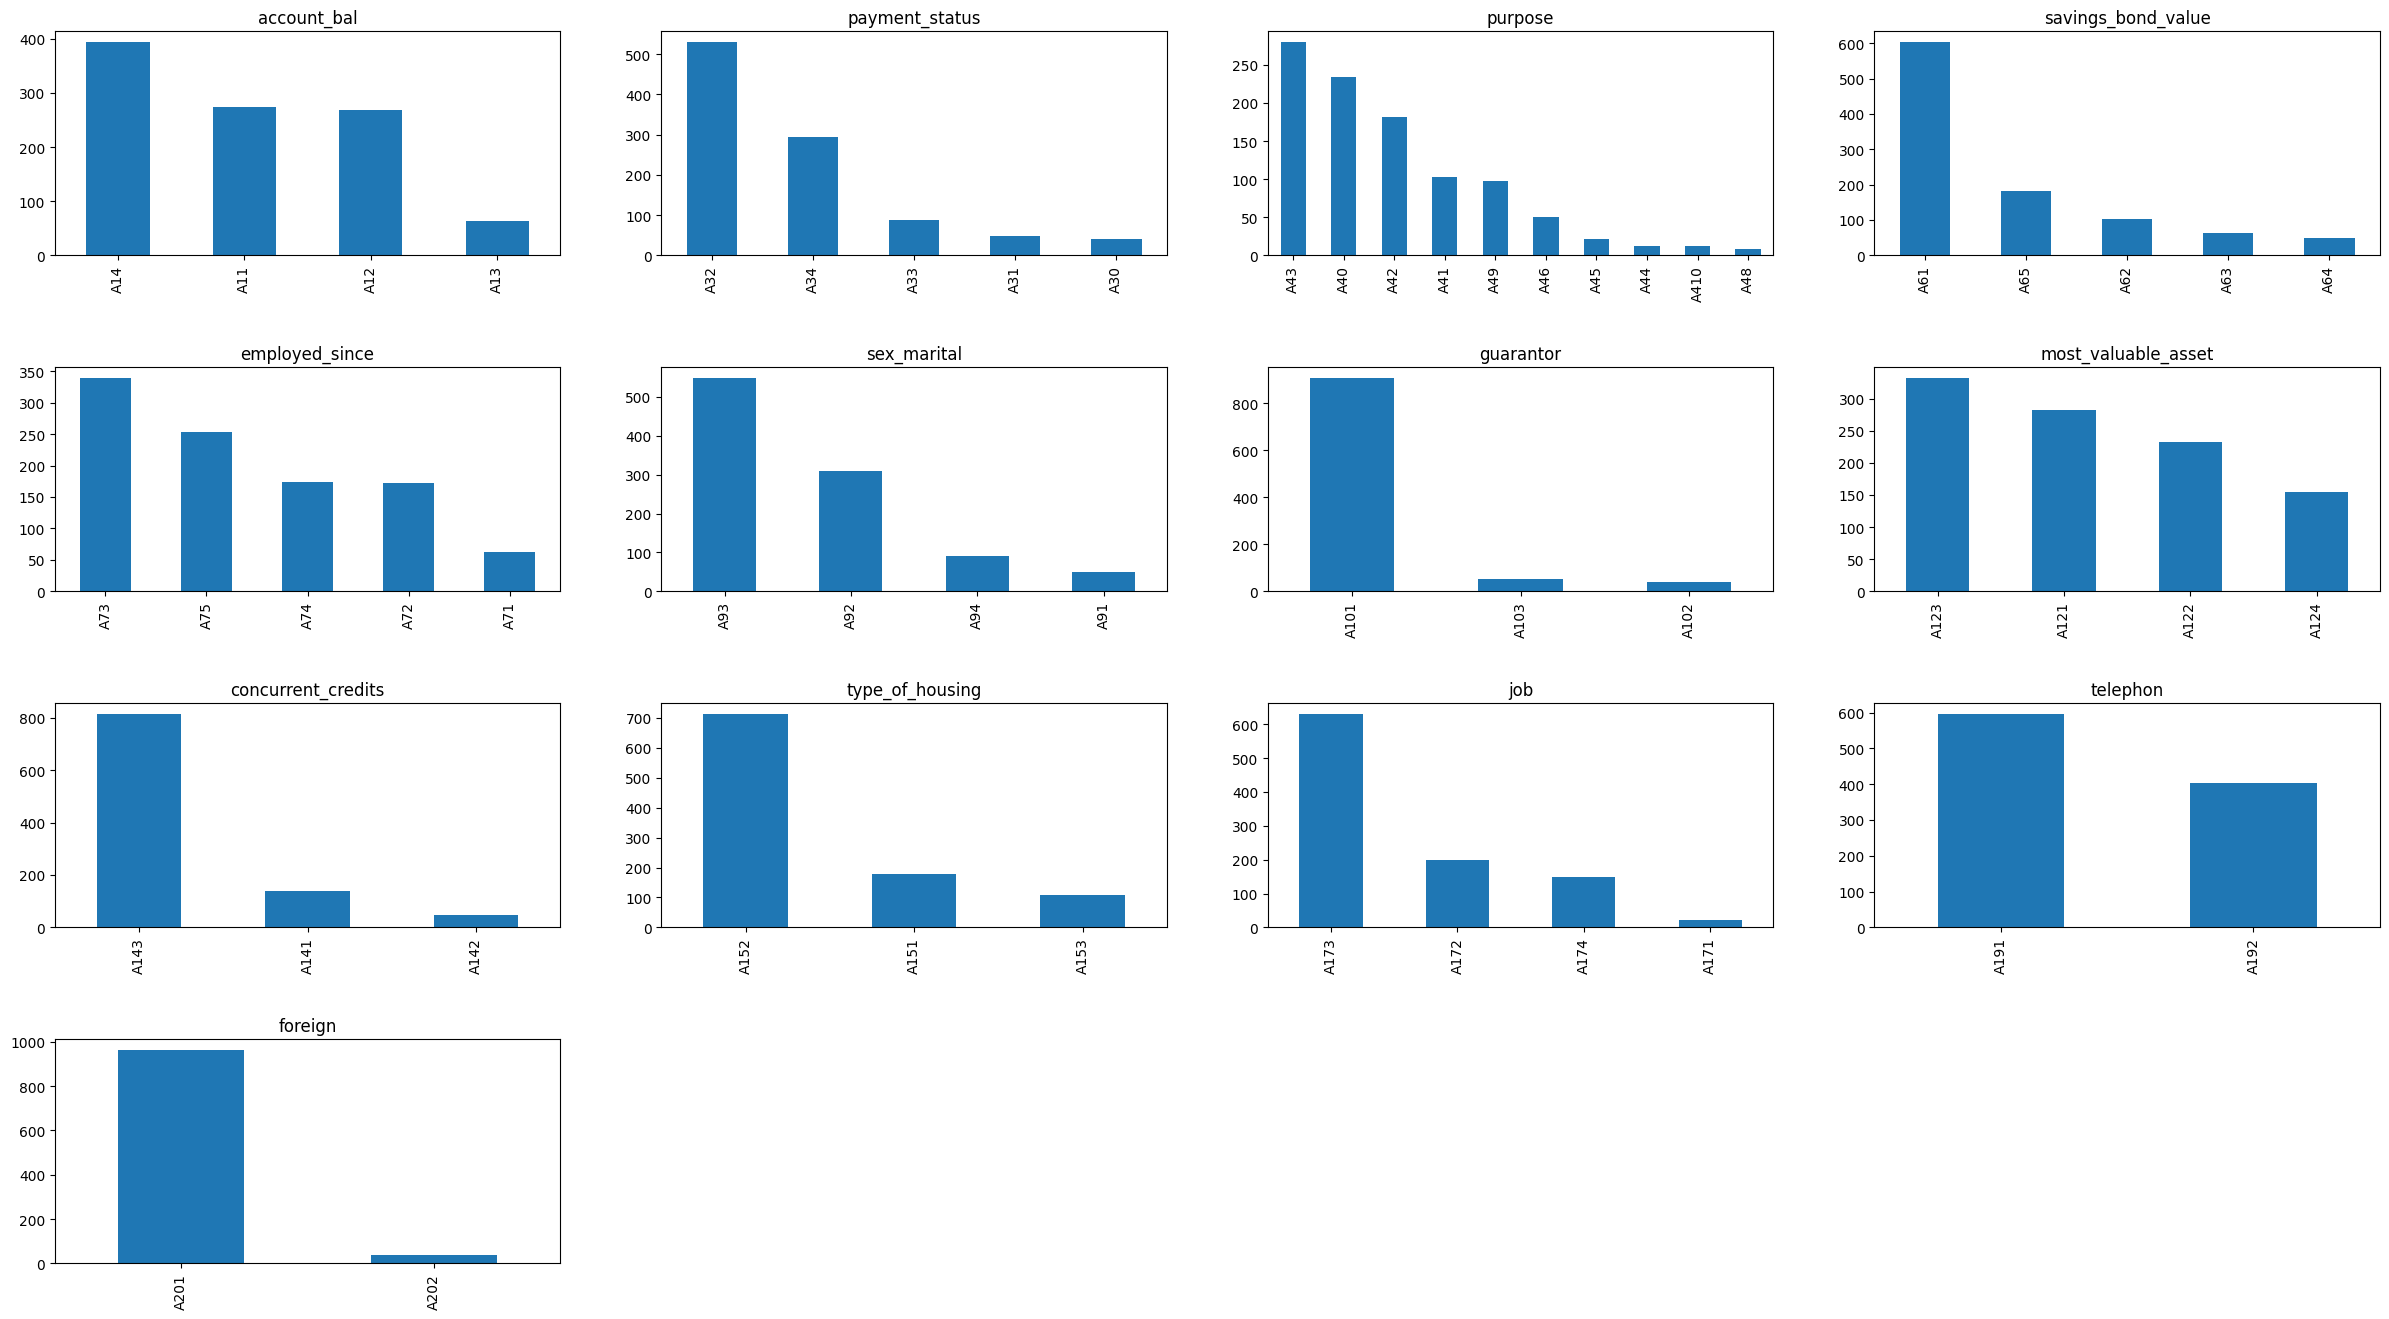

In [ ]:

cate_cols = german_df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    german_df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(german_df, cate_cols, row = 4, col = 4, figsize = (30, 16))

The variables with 1 values:
- foreign

We should eliminate it

In [ ]:
new_german_df = german_df.drop(columns=['foreign'])